### 1. Import Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime



### 2. Import Dataset

In [52]:
df = pd.read_csv(r"D:\Study\Model X\Dementia Prediction\Dataset\processed/Missing_Values_Handled.csv")
df.head()

,BIRTHMO,BIRTHYR,SEX,HISPANIC,RACE,PRIMLANG,EDUC,MARISTAT,NACCLIVS,INDEPEND,...,B12DEF,THYROID,INCONTU,INCONTF,ALCOHOL,ABUSOTHR,DEP2YRS,DEPOTHR,PSYCDIS,DEMENTED
0,5.0,1952,1,0.0,1.0,1.0,16.0,1.0,4.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.0,1952,1,0.0,1.0,1.0,16.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,12.0,1956,1,0.0,1.0,1.0,16.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,1958,2,1.0,1.0,2.0,16.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2.0,1945,1,1.0,1.0,1.0,12.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [53]:
df.columns

Index(['BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'RACE', 'PRIMLANG', 'EDUC',
       'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCAGE',
       'NACCAGEB', 'NACCNIHR', 'INRELTO', 'INLIVWTH', 'INRELY', 'TOBAC30',
       'TOBAC100', 'SMOKYRS', 'PACKSPER', 'CVHATT', 'CVAFIB', 'CVANGIO',
       'CVBYPASS', 'CVPACE', 'CVCHF', 'CVOTHR', 'CBSTROKE', 'CBTIA', 'PD',
       'PDOTHR', 'SEIZURES', 'DIABETES', 'HYPERTEN', 'HYPERCHO', 'B12DEF',
       'THYROID', 'INCONTU', 'INCONTF', 'ALCOHOL', 'ABUSOTHR', 'DEP2YRS',
       'DEPOTHR', 'PSYCDIS', 'DEMENTED'],
      dtype='object')

### 3. Outlier Detection

#### 3.1 Isolating Numercial Non-Binary Columns

In [54]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [55]:
# Filter out binary columns (columns with only 2 unique values, e.g., 0 and 1)
numerical_nonbinary = [col for col in numerical_cols if df[col].nunique() > 2]

In [56]:
print(numerical_nonbinary)

['BIRTHMO', 'BIRTHYR', 'RACE', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCAGE', 'NACCAGEB', 'NACCNIHR', 'INRELTO', 'SMOKYRS', 'PACKSPER', 'CVHATT', 'CVAFIB', 'CVANGIO', 'CVBYPASS', 'CVPACE', 'CVCHF', 'CVOTHR', 'CBSTROKE', 'CBTIA', 'SEIZURES', 'DIABETES', 'HYPERTEN', 'HYPERCHO', 'B12DEF', 'THYROID', 'INCONTU', 'INCONTF', 'ALCOHOL', 'ABUSOTHR', 'PSYCDIS']


#### 3.2 Plotting a Boxplot to see the distribtion

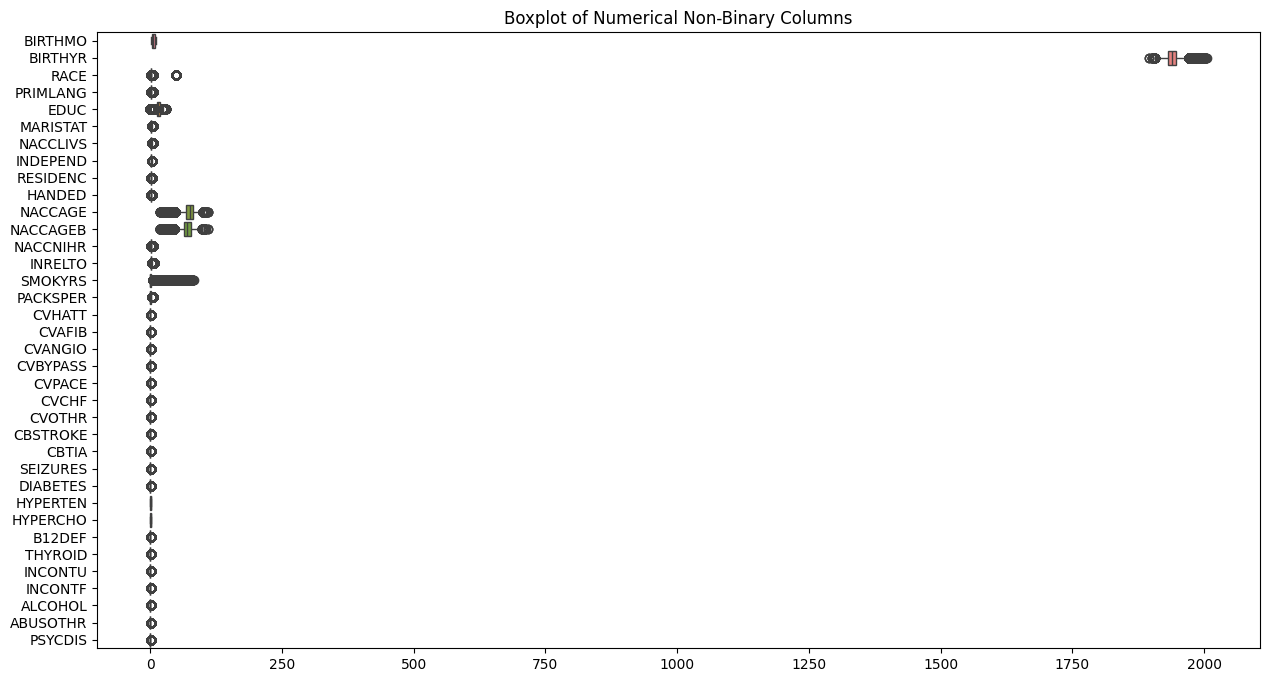

In [27]:
# Quick boxplot for non-binary numerical columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_nonbinary], orient='h')
plt.title("Boxplot of Numerical Non-Binary Columns")
plt.show()

#### 3.3 Detect outliers using usual method

In [57]:
# Detect outliers using IQR
outlier_summary = {}
for col in numerical_nonbinary:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Convert to DataFrame for easy viewing
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Num_Outliers'])
outlier_df = outlier_df[outlier_df['Num_Outliers'] > 0].sort_values(by='Num_Outliers', ascending=False)
print(outlier_df)

      Column  Num_Outliers
14   SMOKYRS         43413
12  NACCNIHR         34727
2       RACE         34624
13   INRELTO         28810
31   INCONTU         28105
30   THYROID         24957
8   RESIDENC         21104
9     HANDED         19793
15  PACKSPER         17461
26  DIABETES         17104
22    CVOTHR         15365
5   MARISTAT         15050
6   NACCLIVS         14657
7   INDEPEND         10756
17    CVAFIB         10485
3   PRIMLANG         10227
32   INCONTF         10003
18   CVANGIO          9271
29    B12DEF          8838
35   PSYCDIS          8588
16    CVHATT          7599
24     CBTIA          7333
33   ALCOHOL          7066
23  CBSTROKE          6953
19  CVBYPASS          5486
4       EDUC          4121
20    CVPACE          4098
21     CVCHF          3779
25  SEIZURES          3663
10   NACCAGE          2816
11  NACCAGEB          2484
1    BIRTHYR          1747
34  ABUSOTHR          1541


#### 3.3 Specific Outlier handling for this case

In [ ]:
current_year = datetime.datetime.now().year
max_birth_year = current_year - 15

valid_ranges = {
    "BIRTHMO": (1, 12),
    "BIRTHYR": (1875, max_birth_year),
    "EDUC": (0, 36),
    "NACCAGE": (18, 120),
    "NACCAGEB": (18, 120),
    "SMOKYRS": (0, 87)
}

valid_categories = {
    "RACE": [1,2,3,4,5,50],
    "PRIMLANG": [1,2,3,4,5,6],
    "MARISTAT": [1,2,3,4,5,6],
    "NACCLIVS": [1,2,3,4,5],
    "INDEPEND": [1,2,3,4],
    "RESIDENC": [1,2,3,4],
    "HANDED": [1,2,3],
    "NACCNIHR": [1,2,3,4,5,6],
    "INRELTO": [1,2,3,4,5,6,7],
    "PACKSPER": [0,1,2,3,4,5]
}

# Clinical binary/multi-state variables all share the same valid codes:
clinical_vars = [
    "CVHATT","CVAFIB","CVANGIO","CVBYPASS","CVPACE","CVCHF","CVOTHR",
    "CBSTROKE","CBTIA","SEIZURES","DIABETES","HYPERTEN","HYPERCHO",
    "B12DEF","THYROID","INCONTU","INCONTF","ALCOHOL","ABUSOTHR","PSYCDIS"
]

clinical_valid = [0,1,2]

In [66]:
outlier_rows = pd.DataFrame()

# Check numerical ranges
for col, (low, high) in valid_ranges.items():
    if col in df.columns:
        mask = (df[col] < low) | (df[col] > high)
        outlier_rows = pd.concat([outlier_rows, df[mask]])

# Check categorical valid codes
for col, allowed in valid_categories.items():
    if col in df.columns:
        mask = ~df[col].isin(allowed)
        outlier_rows = pd.concat([outlier_rows, df[mask]])

# Check clinical variables
for col in clinical_vars:
    if col in df.columns:
        mask = ~df[col].isin(clinical_valid)
        outlier_rows = pd.concat([outlier_rows, df[mask]])

# Remove duplicates
outlier_rows = outlier_rows.drop_duplicates()

print("Total invalid rows detected:", len(outlier_rows))

Total invalid rows detected: 0


In [67]:
df.to_csv("D:\Study\Model X\Dementia Prediction\Dataset\processed/Outlier_Handled.csv", index=False)